In [13]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Imports for arithmetic calculations and data frame manipulation
import math
import numpy as np
import pandas as pd

#imports for splitting data and imputing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#Imports for statistical test
import scipy.stats as stats

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#importying .py files for user defined functions
import wrangle_zillow as w

## Acquire Wrangled Data

In [3]:
train, validate, test = w.wrangle_zillow()
train.shape, validate.shape, test.shape

Using cached csv...


((40064, 34), (17171, 34), (14309, 34))

In [4]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
62924,2806823,11317340,2.0,4.0,6.0,2.0,1860.0,1860.0,6037.0,2.0,...,127127.0,157578.0,2016.0,30451.0,2755.87,6.037901e+13,0.030870,2017-08-01,Central,Single Family Residential
2686,2192094,12965175,4.0,3.0,8.0,4.0,1910.0,1910.0,6037.0,4.0,...,253705.0,667918.0,2016.0,414213.0,8704.21,6.037621e+13,0.021421,2017-01-12,Central,Condominium
35780,64334,11703478,1.0,3.0,6.0,1.0,1822.0,1822.0,6037.0,1.0,...,17787.0,40542.0,2016.0,22755.0,627.91,6.037232e+13,-0.325563,2017-05-12,Central,Single Family Residential
14782,1744938,10931831,3.0,2.0,8.0,3.0,1480.0,1480.0,6037.0,3.0,...,200660.0,473304.0,2016.0,272644.0,5682.71,6.037143e+13,0.009975,2017-03-06,Central,Condominium
27632,1643700,11181835,2.0,3.0,4.0,2.0,1370.0,1370.0,6037.0,2.0,...,43628.0,66954.0,2016.0,23326.0,918.71,6.037910e+13,0.010471,2017-04-19,Central,Single Family Residential


## Exercise Instructions
- Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
- Answer those questions through a mix of statistical tests and visualizations.

### Question 1: Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

#### Initial Setup

In [7]:
# Creating data frame with just necessary columns 
logerror_df = train[['parcelid', 'logerror', 'fips']].copy()
logerror_df.head()

,parcelid,logerror,fips
62924,11317340,0.030870,6037.0
2686,12965175,0.021421,6037.0
35780,11703478,-0.325563,6037.0
14782,10931831,0.009975,6037.0
27632,11181835,0.010471,6037.0


In [14]:
# Creating a new county column using fips values 
counties = {6037:'Los Angeles', 6059:'Orange', 6111:'Ventura'}
logerror_df['county'] = logerror_df.fips.map(counties)
logerror_df.head()

,parcelid,logerror,fips,county
62924,11317340,0.030870,6037.0,Los Angeles
2686,12965175,0.021421,6037.0,Los Angeles
35780,11703478,-0.325563,6037.0,Los Angeles
14782,10931831,0.009975,6037.0,Los Angeles
27632,11181835,0.010471,6037.0,Los Angeles


<AxesSubplot:xlabel='county', ylabel='logerror'>

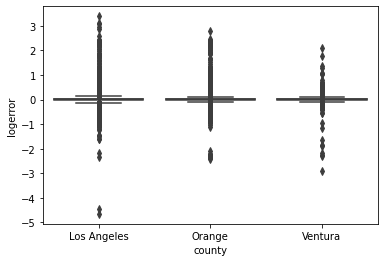

In [26]:
# Comparae logerror by county
sns.boxplot(data = logerror_df, x='county', y='logerror')

<AxesSubplot:xlabel='county', ylabel='logerror'>

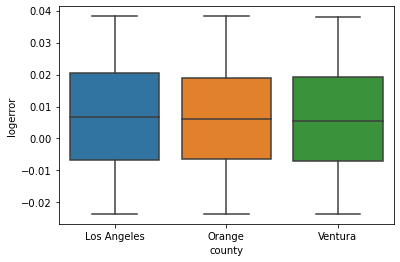

In [27]:
# Data is highly skewed so I will create quantile to compare using only the inner quantiles
## Determine quantiles
q1, q3 = logerror_df.logerror.quantile([.25, .75])

#plot boxplots to compare
sns.boxplot(data=logerror_df[(logerror_df.logerror > q1) & (logerror_df.logerror < q3)], x='county', y='logerror')

In [28]:
# Set up variables for the county logerrors
la = logerror_df[logerror_df.county == 'Los Angeles']
orange = logerror_df[logerror_df.county == 'Orange']
ventura = logerror_df[logerror_df.county == 'Ventura']

**I want to compare county logerorr mean to population mean but I don't have normal distribution so I will use non-parametric test. (Mann-whitney's)**

### Los Angeles logerror vs. population logerror? 

$H0$: There is no significant difference between the county logerror and the total population logerror.

$Ha$: There is a signifcant difference between the county logerror and the total population logerror.

In [21]:
alpha = .05 / 2
t, p = stats.mannwhitneyu(la.logerror, logerror_df.logerror, alternative='two-sided')

if p < alpha:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('We fail to reject the null hypothesis. There is a significant difference.')

We fail to reject the null hypothesis. There is a significant difference.


### Orange logerror vs. population logerror? 

$H0$: There is no significant difference between the county logerror and the total population logerror.

$Ha$: There is a signifcant difference between the county logerror and the total population logerror.

In [23]:
alpha = .05 / 2
t, p = stats.mannwhitneyu(orange.logerror, logerror_df.logerror, alternative='two-sided')

if p < alpha:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('We fail to reject the null hypothesis. There is a significant difference.')

We fail to reject the null hypothesis. There is a significant difference.


### Ventura logerror vs. population logerror? 

$H0$: There is no significant difference between the county logerror and the total population logerror.

$Ha$: There is a signifcant difference between the county logerror and the total population logerror.

In [24]:
alpha = .05 / 2
t, p = stats.mannwhitneyu(ventura.logerror, logerror_df.logerror, alternative='two-sided')

if p < alpha:
    print('We reject the null hypothesis with 95% confidence.')
else:
    print('We fail to reject the null hypothesis. There is a significant difference.')

We fail to reject the null hypothesis. There is a significant difference.


## Question 2: Is logerror significantly different per age of the home?

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40064 entries, 62924 to 59940
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            40064 non-null  int64  
 1   parcelid                      40064 non-null  int64  
 2   bathroomcnt                   40064 non-null  float64
 3   bedroomcnt                    40064 non-null  float64
 4   buildingqualitytypeid         24997 non-null  float64
 5   calculatedbathnbr             40064 non-null  float64
 6   calculatedfinishedsquarefeet  40064 non-null  float64
 7   finishedsquarefeet12          40064 non-null  float64
 8   fips                          40064 non-null  float64
 9   fullbathcnt                   40064 non-null  float64
 10  heatingorsystemtypeid         25964 non-null  float64
 11  latitude                      40064 non-null  float64
 12  longitude                     40064 non-null  float64
 1

<AxesSubplot:>

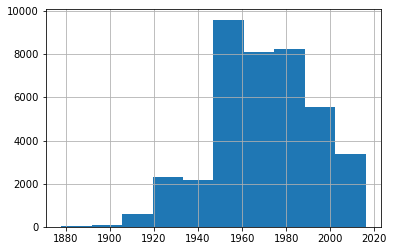

In [37]:
## Create a new column with a calculate age of the home using the year_built column
train.yearbuilt.hist()

In [38]:
train.yearbuilt.max()

2016.0

In [41]:
## Create a new column with a calculate age of the home using the year_built column
train['age'] = train.yearbuilt.max() - train.yearbuilt
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,age
62924,2806823,11317340,2.0,4.0,6.0,2.0,1860.0,1860.0,6037.0,2.0,...,157578.0,2016.0,30451.0,2755.87,6.037901e+13,0.030870,2017-08-01,Central,Single Family Residential,18.0
2686,2192094,12965175,4.0,3.0,8.0,4.0,1910.0,1910.0,6037.0,4.0,...,667918.0,2016.0,414213.0,8704.21,6.037621e+13,0.021421,2017-01-12,Central,Condominium,2.0
35780,64334,11703478,1.0,3.0,6.0,1.0,1822.0,1822.0,6037.0,1.0,...,40542.0,2016.0,22755.0,627.91,6.037232e+13,-0.325563,2017-05-12,Central,Single Family Residential,104.0
14782,1744938,10931831,3.0,2.0,8.0,3.0,1480.0,1480.0,6037.0,3.0,...,473304.0,2016.0,272644.0,5682.71,6.037143e+13,0.009975,2017-03-06,Central,Condominium,6.0
27632,1643700,11181835,2.0,3.0,4.0,2.0,1370.0,1370.0,6037.0,2.0,...,66954.0,2016.0,23326.0,918.71,6.037910e+13,0.010471,2017-04-19,Central,Single Family Residential,62.0


In [42]:
# Create dataframe with just year data and logerror
age_df = train.copy()
age_df = age_df[['yearbuilt', 'age', 'logerror']]
age_df.head()

,yearbuilt,age,logerror
62924,1998.0,18.0,0.030870
2686,2014.0,2.0,0.021421
35780,1912.0,104.0,-0.325563
14782,2010.0,6.0,0.009975
27632,1954.0,62.0,0.010471


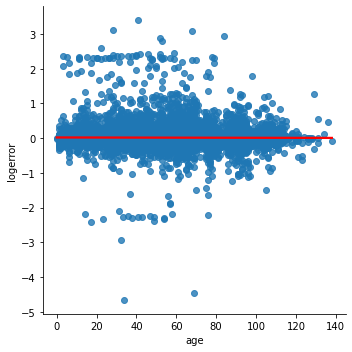

In [48]:
sns.lmplot(data = age_df, x='age', y='logerror', line_kws={'color':'red'})
plt.show()

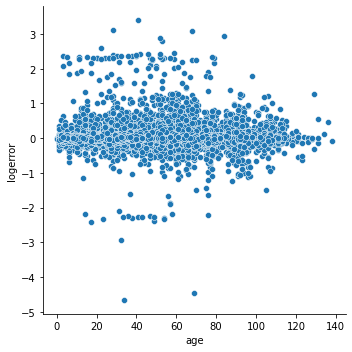

In [49]:
sns.relplot(data=age_df, x='age', y='logerror')